Files already downloaded and verified
Files already downloaded and verified


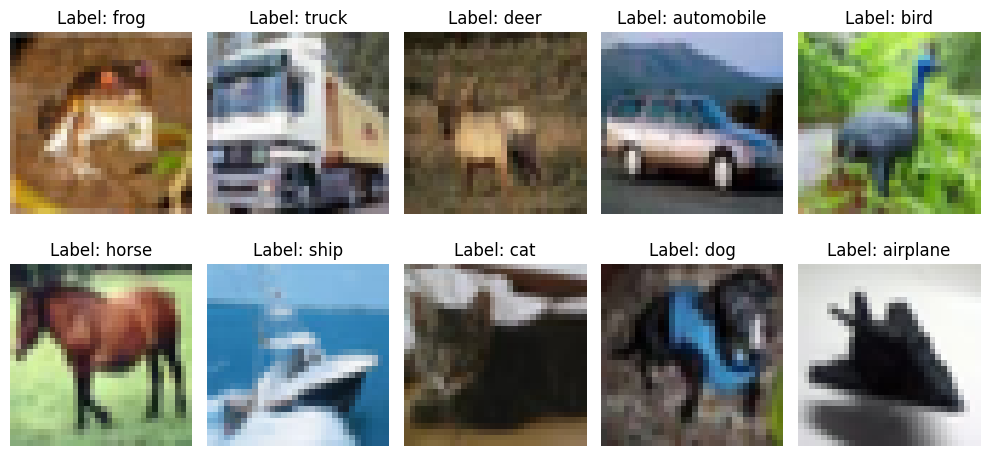

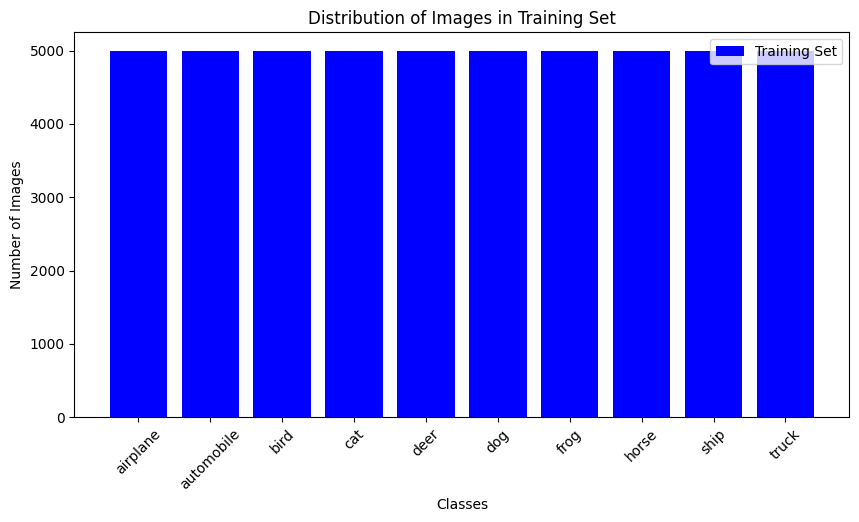

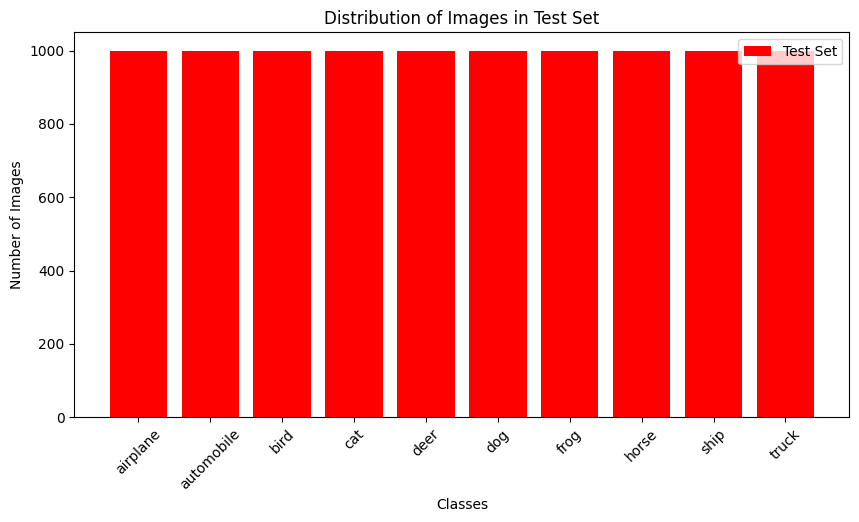

<class 'PIL.Image.Image'>
<class 'int'>
<class 'tuple'>
<PIL.Image.Image image mode=RGB size=32x32 at 0x7F8A9AF302B0>
image type: <class 'torch.Tensor'> image size: torch.Size([3, 32, 32]) or torch.Size([3, 32, 32])
label type: <class 'int'>
Files already downloaded and verified
Files already downloaded and verified
DEVICE:  cuda:0
model is training...
----------------------SPECS--------------------
[1,  2000] training loss: 2.302 | Accuracy: 20.0
[1,  4000] training loss: 2.296 | Accuracy: 10.0
[1,   500] eval loss: 2.276 | Accuracy: 40.0
[1,  1000] eval loss: 2.277 | Accuracy: 30.0
[2,  2000] training loss: 2.101 | Accuracy: 30.0
[2,  4000] training loss: 1.894 | Accuracy: 40.0
[2,   500] eval loss: 1.775 | Accuracy: 40.0
[2,  1000] eval loss: 1.787 | Accuracy: 30.0
[3,  2000] training loss: 1.727 | Accuracy: 40.0
[3,  4000] training loss: 1.599 | Accuracy: 30.0
[3,   500] eval loss: 1.511 | Accuracy: 60.0
[3,  1000] eval loss: 1.531 | Accuracy: 20.0
[4,  2000] training loss: 1.491 |

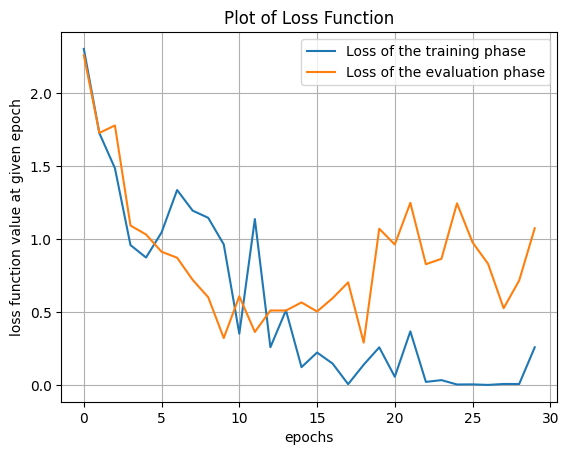

Files already downloaded and verified
Files already downloaded and verified
upgraded model is training...
----------------------SPECS--------------------
[1,   625] training loss: 2.169 | Accuracy: 15.625
[1,  1250] training loss: 2.012 | Accuracy: 25.0
[1,   100] eval loss: 2.322 | Accuracy: 9.375
[1,   200] eval loss: 2.329 | Accuracy: 6.25
[1,   300] eval loss: 2.331 | Accuracy: 12.5
[2,   625] training loss: 1.927 | Accuracy: 25.0
[2,  1250] training loss: 1.782 | Accuracy: 37.5
[2,   100] eval loss: 1.705 | Accuracy: 31.25
[2,   200] eval loss: 1.709 | Accuracy: 25.0
[2,   300] eval loss: 1.699 | Accuracy: 37.5
[3,   625] training loss: 1.710 | Accuracy: 25.0
[3,  1250] training loss: 1.646 | Accuracy: 56.25
[3,   100] eval loss: 1.604 | Accuracy: 37.5
[3,   200] eval loss: 1.591 | Accuracy: 25.0
[3,   300] eval loss: 1.598 | Accuracy: 50.0
[4,   625] training loss: 1.601 | Accuracy: 50.0
[4,  1250] training loss: 1.555 | Accuracy: 43.75
[4,   100] eval loss: 1.482 | Accuracy: 25.

In [10]:
# -*- coding: utf-8 -*-
"""Untitled0.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1OpWjfW2mAaAwWqdNI6_yKEHwZVP5Xnm9
"""

# @title MIOTTO PIETRO
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import platform

#-----PLOT FUNCTIONS ---------------------------------------

def plot_histogram(classes,trainset,testset):

    train_counts = {class_name: 0 for class_name in classes}
    test_counts = {class_name: 0 for class_name in classes}


    for _, label in trainset:
      class_name = classes[label]
      train_counts[class_name] += 1


    for _, label in testset:
      class_name = classes[label]
      test_counts[class_name] += 1


    plt.figure(figsize=(10, 5))
    plt.bar(train_counts.keys(), train_counts.values(), color='blue', label='Training Set')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images in Training Set')
    plt.xticks(rotation=45)
    plt.legend()

    plt.show()


    plt.figure(figsize=(10, 5))
    plt.bar(test_counts.keys(), test_counts.values(), color='red', label='Test Set')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images in Test Set')
    plt.xticks(rotation=45)
    plt.legend()

    plt.show()


def implot(images,labels):

  fig, axs = plt.subplots(2, 5, figsize=(10, 5))


  axs = axs.flatten()


  for i in range(len(images)):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Label: {labels[i]}")

  plt.tight_layout()
  plt.show()

def plot_loss(loss, steps, toprint=True, label=''):
    if (toprint==True):
        plt.plot(steps, loss, label=label)
        plt.xlabel('steps')
        plt.ylabel('loss')
        plt.title('Plot of Loss Function')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        return plt.plot(steps, loss, label=label)

#----------------------INITIAL MODEL------------------------------------
class CNNModel(nn.Module):
  def __init__(self):
    super().__init__()

    #convolutional layers
    self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
    self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
    self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
    #pooling layer
    self.pool = nn.MaxPool2d(2, 2)

    #fully-connected layers
    self.fc1 = nn.Linear(256 * 4 , 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)


  def forward(self, x): #Forward step

    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.pool(F.relu(self.conv4(x)))
    x = torch.flatten(x, 1)  # flatten all dimensions except batch
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  #------------------------------------------------------------------------

  #----------------------UPGRADED MODEL------------------------------------
class CNNModel2(nn.Module):
  def __init__(self):
    super().__init__()

    # Convolutional layers
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
    self.conv5 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
    self.conv6 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
    self.LRelu = nn.LeakyReLU(0.1)

    # Max pooling layer
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    # Dropout layer
    self.dropout = nn.Dropout(0.5)

    #BatchNormalization
    self.batchN1 = nn.BatchNorm2d(32)
    self.batchN2 = nn.BatchNorm2d(64)
    self.batchN3 = nn.BatchNorm2d(128)

    # Fully connected layers
    self.fc1 = nn.Linear(128 * 4 * 4, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
      x = self.LRelu(self.batchN1(self.conv1(x)))
      x = self.LRelu(self.batchN1(self.conv2(x)))
      x = self.pool(x)
      x = self.dropout(x)

      x = self.LRelu(self.batchN2(self.conv3(x)))
      x = self.LRelu(self.batchN2(self.conv4(x)))
      x = self.pool(x)
      x = self.dropout(x)

      x = self.LRelu(self.batchN3(self.conv5(x)))
      x = self.LRelu(self.batchN3(self.conv6(x)))
      x = self.pool(x)
      x = self.dropout(x)

      # Flatten the output
      x = torch.flatten(x, 1)

      x = F.relu(self.fc1(x))
      x = self.dropout(x)
      x = self.fc2(x)

      return x
  #------------------------------------------------------------------------


  #------------------MAIN------------------------------------

if __name__ == "__main__":

  #***QUESTION 1.11 **-------

    trainset = torchvision.datasets.CIFAR10(root='./content/CIFAR-10', train=True,download=True)
    testset = torchvision.datasets.CIFAR10(root='./content/CIFAR-10', train=False,download=True)
    classes = trainset.classes

    #iterate on dataset and save one image for each class
    images =[]
    labels=[]
    for i in range(len(trainset)):
      image, label = trainset[i]
      #print("labels of image [", i, "]: ", label)
      if label not in labels:
        images.append(image)
        labels.append(label)

    class_labels = [classes[int(labels[j])] for j in range(len(labels))]

    #PLOT IMAGES and LABELS
    implot(images, class_labels)

    #PLOT HISTOGRAM
    plot_histogram(classes, trainset, testset)

    #***QUESTION 1.12 **-------

    #PRINT INFOs ABOUT DATA and TENSORS
    image, label = trainset[2]
    print(type(image))
    print(type(label))
    print(type(trainset[2]))
    print((image))
    #each element of the trainset is a tuple containing an int (which is the label)
    #and a PIL.image.Image element, which is an RGB image of size=32x32

    #to make it suitable we need to make it into a tensor
    trainset = torchvision.datasets.CIFAR10(root='./content/CIFAR-10', train=True,download=False, transform=transforms.ToTensor())
    image_T, label_T = trainset[0]
    print("image type:", type(image_T), "image size:", image_T.size(), "or", image_T.shape)
    print("label type:", type(label_T))
    #the dimension of the image as a tensor is a 32x32 input size with number of channels=3.
    #I.e. each image tensor contains 3 images of 32x32

    #***QUESTION 1.13 **
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0,0,0), (1,1,1))]) #mean 0, std 1

    trainset = torchvision.datasets.CIFAR10(root='./content/CIFAR-10', train=True,download=True, transform=transform)
    testset = torchvision.datasets.CIFAR10(root='./content/CIFAR-10', train=False,download=True, transform=transform)
    #Setting num_workers to a value greater than 0 will create multiple worker processes to parallelize data loading.

    #***QUESTION 1.14 **

    batch_size=10
    manual_seed = 42

    generator1 = torch.Generator().manual_seed(manual_seed)
    train_size = int(0.8 * len(trainset))
    eval_size = len(trainset) - train_size
    trainset, evalset = torch.utils.data.random_split(trainset, [train_size, eval_size], generator=generator1)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
    evalloader = torch.utils.data.DataLoader(evalset, batch_size=batch_size,shuffle=False, num_workers=2)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

    #***QUESTION 1.3 **

    #define the device
    DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
    print("DEVICE: ", DEVICE)

    #instanciate the model
    model = CNNModel()
    model = model.to(DEVICE)
    loss_fn = nn.CrossEntropyLoss()
    learning_rate = 0.001 #suggested: 0.1 #adam is good optimizer
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=(0.9),weight_decay=0) #momentum: what proportion of past gradients
                                                                                            #togliere weight decay per modello base
    # optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9,0.999),weight_decay=1e-4)

    loss_eval = []  # create an emply list for the validation loss
    loss_training = [] # create an empty list for training loss
    #softmax = nn.Softmax(dim=1) MOD1

    loss = 1e308
    epochs=30
    
    print('model is training...')
    print('----------------------SPECS--------------------')
    
    #-----------TRAINING&EVALUATION---------------------
    for epoch in range(epochs):

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data[0].to(DEVICE), data[1].to(DEVICE)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = model(inputs)
          outputs = outputs.to(DEVICE)

          #forward step
          #print("outputs: ", outputs.size(), "| labels ", h.size()) #UTILE PER DESCRIVERE TENSORI
          loss = loss_fn(outputs, labels) #MOD1(outputs, h)
          loss.backward()
          optimizer.step()


          # print statistics 
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              _, predicted = torch.max(outputs, 1)
              correct = (predicted == labels).sum().item()
              accuracy_train = correct / batch_size
              print(f'[{epoch + 1}, {i + 1:5d}] training loss: {running_loss / 2000:.3f} | Accuracy: {accuracy_train*100}')
              running_loss = 0.0
              #saving model
              #PATH = '/content/MIOTTO_PIETRO_1.ph'
              #torch.save(model.state_dict(), PATH)


      loss_training.append(loss.item()) #at each step append loss


      #evaluation phase
      model.eval()
      running_loss = 0
      for i, data in enumerate(evalloader,0):
          e_inputs, e_labels = data
          e_inputs = e_inputs.to(DEVICE)
          e_labels = e_labels.to(DEVICE)
          e_outputs = model(e_inputs)
          e_outputs = e_outputs.to(DEVICE)
          with torch.no_grad():
            e_loss = loss_fn(e_outputs, e_labels)
            running_loss += e_loss.item()
            
            # print statistics (uncommment to print specific statistics during training)
            if i % 500 == 499:
              _, predicted = torch.max(e_outputs, 1)
              correct = (predicted == e_labels).sum().item()
              accuracy_eval = correct / batch_size
              print(f'[{epoch + 1}, {i + 1:5d}] eval loss: {running_loss/500:.3f} | Accuracy: {accuracy_eval*100}')
              running_loss =0
      loss_eval.append(e_loss.item())
    
    #saving model(uncomment to save model locally)
    #PATH = '/content/model1.ph'
    #torch.save(model.state_dict(), PATH)

  #--------------------------------------------
    print('model ended training ✅ ')
  #--------------RUN MODEL on TEST SET --------
    correct = 0
    total = 0

    with torch.no_grad():
      for data in testloader:
          images, labels = data[0].to(DEVICE), data[1].to(DEVICE)

          outputs = model(images)

          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

  #--------------------------------------------

  #--------------PLOT --------
    plot_loss(loss_training, np.arange(0,epochs,1),toprint=False, label='Loss of the training phase')
    plot_loss(loss_eval, np.arange(0,epochs,1), toprint=False, label='Loss of the evaluation phase')
    plt.xlabel('epochs')
    plt.ylabel('loss function value at given epoch')
    plt.title('Plot of Loss Function')
    plt.legend()
    plt.grid(True)
    plt.show()

    #---------------------------UPGRADED MODEL TRAINING LOOP ---------------------------------------

    #Data Augmentation
    transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.RandomRotation(10),
                                  transforms.RandomAffine(0, shear=10,scale=(0.1,1.2)), transforms.ColorJitter(brightness=0.2,contrast=0.2, saturation=0.2),
                                  transforms.ToTensor(), transforms.Normalize((0,0,0),(1,1,1))])
    trainset2 = torchvision.datasets.CIFAR10(root='./content/CIFAR-10', train=True,download=True, transform=transform)
    testset2 = torchvision.datasets.CIFAR10(root='./content/CIFAR-10', train=False,download=True, transform= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0,0,0), (1,1,1))]))

    batch_size=32
    manual_seed = 42
    generator1 = torch.Generator().manual_seed(manual_seed)
    train_size2 = int(0.8 * len(trainset2))
    eval_size2 = len(trainset2) - train_size2
    trainset2, evalset2 = torch.utils.data.random_split(trainset2, [train_size2, eval_size2], generator=generator1)
    trainloader2 = torch.utils.data.DataLoader(trainset2, batch_size=batch_size,shuffle=True, num_workers=2)
    evalloader2 = torch.utils.data.DataLoader(evalset2, batch_size=batch_size,shuffle=False, num_workers=2)
    testloader2 = torch.utils.data.DataLoader(testset2, batch_size=batch_size,shuffle=False, num_workers=2)

    #Training Loop
    model2 = CNNModel2()
    model2 = model2.to(DEVICE)
    loss_fn = nn.CrossEntropyLoss()
    learning_rate = 0.001
    optimizer = optim.SGD(model2.parameters(), lr=learning_rate, momentum=(0.9),weight_decay=0)


    loss_eval = []
    loss_training = []

    loss = 1e308
    epochs = 70
    
    print('upgraded model is training...')
    print('----------------------SPECS--------------------')

    for epoch in range(epochs):

      #training phase ----------------------------------------------------------
      running_loss = 0.0
      for i, data in enumerate(trainloader2, 0):

          inputs, labels = data[0].to(DEVICE), data[1].to(DEVICE)


          optimizer.zero_grad()


          outputs = model2(inputs)
          outputs = outputs.to(DEVICE)

          #forward step

          loss = loss_fn(outputs, labels)
          loss.backward()
          optimizer.step()


          # print statistics
          running_loss += loss.item()
          if i % 625 == 624:
            _, predicted = torch.max(outputs, 1)
            correct = (predicted == labels).sum().item()
            accuracy_train = correct / batch_size
            print(f'[{epoch + 1}, {i + 1:5d}] training loss: {running_loss / 625:.3f} | Accuracy: {accuracy_train*100}')
            running_loss = 0.0
            #saving model
            #PATH = '/content/MIOTTO_PIETRO_v2.ph'
            #torch.save(model.state_dict(), PATH)


      loss_training.append(loss.item()) #at each step append loss


      #evaluation phase----------------------------------------------------------
      model2.eval()
      running_loss = 0
      for i, data in enumerate(evalloader2,0):
        e_inputs, e_labels = data
        e_inputs = e_inputs.to(DEVICE)
        e_labels = e_labels.to(DEVICE)
        e_outputs = model2(e_inputs)
        e_outputs = e_outputs.to(DEVICE)
        with torch.no_grad():
          e_loss = loss_fn(e_outputs, e_labels)
          running_loss += e_loss.item()
          if i % 100 == 99:
            _, predicted = torch.max(e_outputs, 1)
            correct = (predicted == e_labels).sum().item()
            accuracy_eval = correct / batch_size
            print(f'[{epoch + 1}, {i + 1:5d}] eval loss: {running_loss/100:.3f} | Accuracy: {accuracy_eval*100}')
            running_loss =0
      loss_eval.append(e_loss.item())
    
    #saving model(uncomment to save model2 locally)
    #PATH = '/content/MIOTTO_PIETRO_2.ph'
    #torch.save(model2.state_dict(), PATH)
    
    print('model ended training ✅ ')
      #----------------------- TEST SET --------------------------------

    correct = 0
    total = 0
    with torch.no_grad():
      for data in testloader2:
        images, labels = data[0].to(DEVICE), data[1].to(DEVICE)
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')